
Train - Summary Statistics:
        text_length  sentence_count    word_count
count  12457.000000    12457.000000  12457.000000
mean      87.397929        0.838083     16.917958
std       37.641178        0.831521      7.845674
min       19.000000        0.000000      4.000000
25%       61.000000        0.000000     11.000000
50%       80.000000        1.000000     16.000000
75%      106.000000        1.000000     21.000000
max      478.000000        7.000000     99.000000

Dev - Summary Statistics:
       text_length  sentence_count  word_count
count   499.000000      499.000000  499.000000
mean     81.709419        0.695391   15.474950
std      35.877381        0.762709    7.309074
min      25.000000        0.000000    4.000000
25%      55.000000        0.000000   10.000000
50%      74.000000        1.000000   14.000000
75%      98.000000        1.000000   19.000000
max     263.000000        5.000000   52.000000


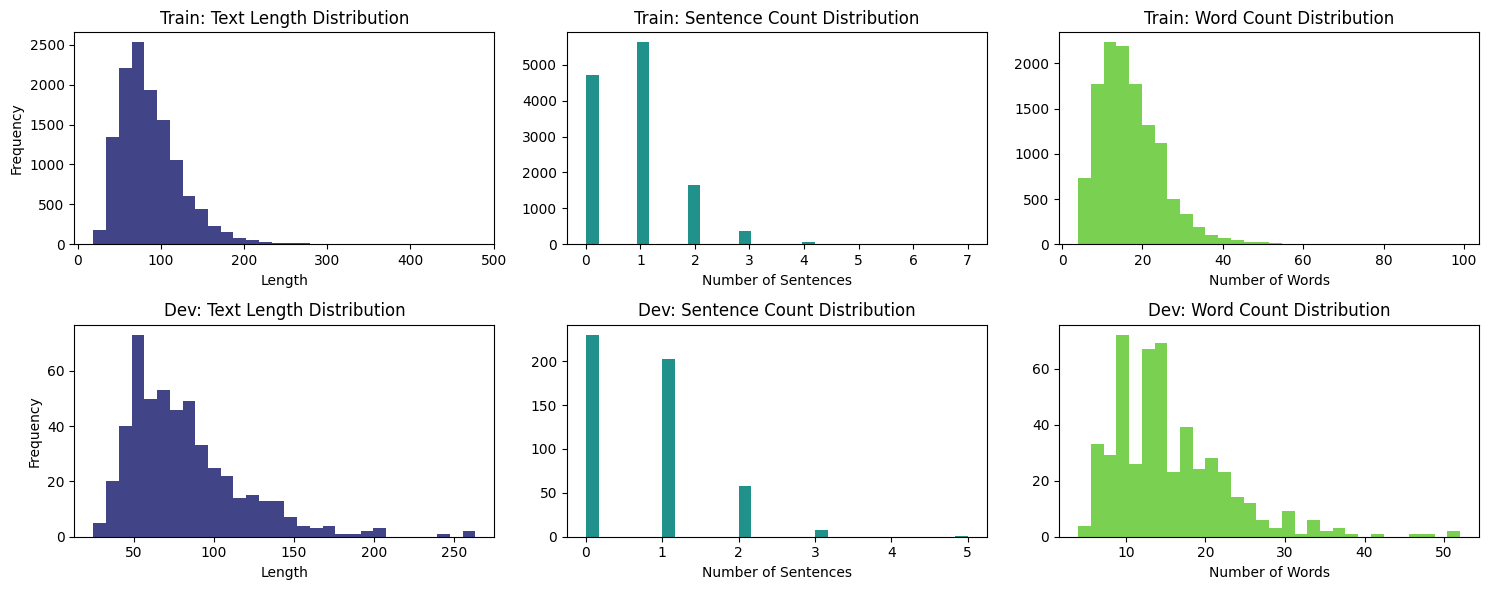

In [8]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt

def extract_summary_metrics(file_path):
    df = pd.read_csv(file_path)
    
    if 'summary' not in df.columns:
        raise ValueError("'summary' 열이 CSV 파일에 없습니다.")
    
    df['text_length'] = df['summary'].apply(len)
    df['sentence_count'] = df['summary'].apply(lambda x: len(x.split('. ')) - 1)
    df['word_count'] = df['summary'].apply(lambda x: len(x.split()))

    return df

def print_summary_statistics(df, label):
    # 각 메트릭의 통계량 계산
    stats = df[['text_length', 'sentence_count', 'word_count']].describe()
    
    print(f"\n{label} - Summary Statistics:")
    print(stats)

def plot_summary_metrics(train_df, dev_df):
    fig, axes = plt.subplots(2, 3, figsize=(15, 6))
    
    # Train 데이터 히스토그램
    axes[0, 0].hist(train_df['text_length'], bins=30, color=plt.cm.viridis(0.2))
    axes[0, 0].set_title('Train: Text Length Distribution')
    axes[0, 0].set_xlabel('Length')
    axes[0, 0].set_ylabel('Frequency')

    axes[0, 1].hist(train_df['sentence_count'], bins=30, color=plt.cm.viridis(0.5))
    axes[0, 1].set_title('Train: Sentence Count Distribution')
    axes[0, 1].set_xlabel('Number of Sentences')

    axes[0, 2].hist(train_df['word_count'], bins=30, color=plt.cm.viridis(0.8))
    axes[0, 2].set_title('Train: Word Count Distribution')
    axes[0, 2].set_xlabel('Number of Words')

    # Dev 데이터 히스토그램
    axes[1, 0].hist(dev_df['text_length'], bins=30, color=plt.cm.viridis(0.2))
    axes[1, 0].set_title('Dev: Text Length Distribution')
    axes[1, 0].set_xlabel('Length')
    axes[1, 0].set_ylabel('Frequency')

    axes[1, 1].hist(dev_df['sentence_count'], bins=30, color=plt.cm.viridis(0.5))
    axes[1, 1].set_title('Dev: Sentence Count Distribution')
    axes[1, 1].set_xlabel('Number of Sentences')

    axes[1, 2].hist(dev_df['word_count'], bins=30, color=plt.cm.viridis(0.8))
    axes[1, 2].set_title('Dev: Word Count Distribution')
    axes[1, 2].set_xlabel('Number of Words')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os_name = platform.system()
    if os_name == 'Windows':
        PRE_PATH = ''
    elif os_name == 'Linux':
        PRE_PATH = '/kkh/'
    elif os_name == 'Darwin': # 맥
        PRE_PATH = '/kkh/'

    DATA_PATH = PRE_PATH + "data/"
    train_file_path = DATA_PATH + 'train.csv'
    dev_file_path = DATA_PATH + 'dev.csv'
    
    # Train 데이터 메트릭 추출 및 통계량 출력
    train_df = extract_summary_metrics(train_file_path)
    print_summary_statistics(train_df, "Train")
    
    # Dev 데이터 메트릭 추출 및 통계량 출력
    dev_df = extract_summary_metrics(dev_file_path)
    print_summary_statistics(dev_df, "Dev")
    
    # 메트릭 시각화
    plot_summary_metrics(train_df, dev_df)
